In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N40, Olisthesis L5-S1, M, 15 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N10,S,63,F_1003_2.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N21, Olisthesis L5-S1, F, 54 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N25, Olisthesis L4-5, F, 50 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N11, Olisthesis. L4-5, M, 48 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N41,S,54,M_1_0.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N13, Olisthesis L4-5, F, 60 yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N23,S,78,M_1001_0.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N6, Olisthesis L4-5, F, 60 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N14, Olisthesis L4-5, M, 48 Yrs.jpg
/kaggle/input

#getting number of images of the 3 classes

In [7]:

from PIL import Image
import matplotlib.pyplot  as plt
base_path = "/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331"
classes = ['Normal' , 'Scol', 'Spond']
image_counts= {}
for class_name in classes:
    folder_path = os.path.join(base_path , class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[class_name] = len(image_files)

df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'ImageCount'])
df_counts
    



,Class,ImageCount
0,Normal,71
1,Scol,185
2,Spond,78


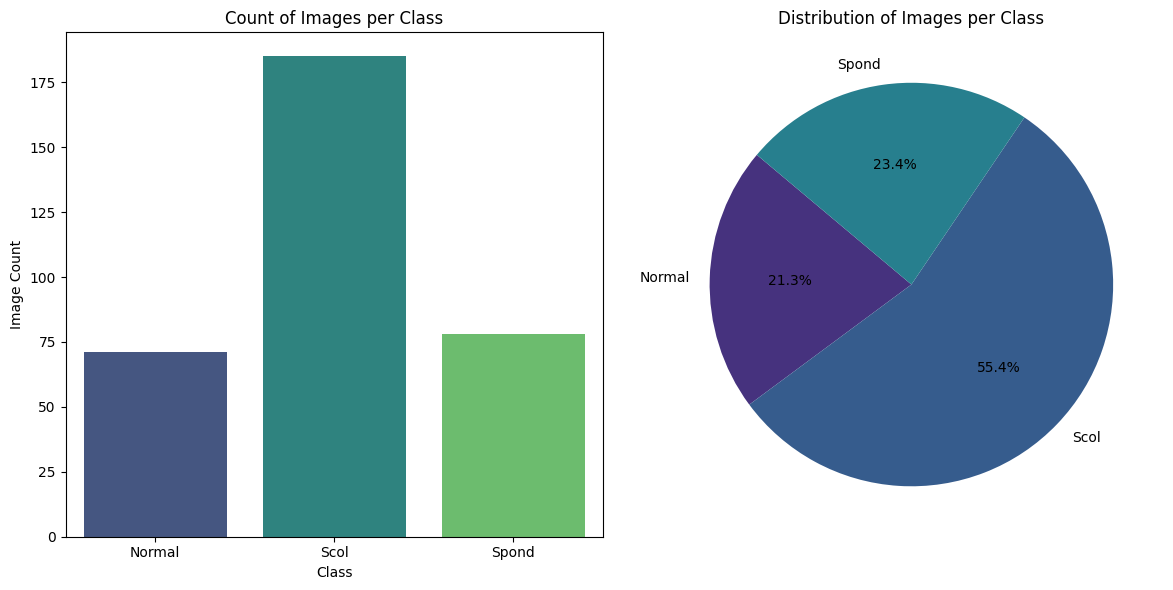

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")
plt.title('Count of Images per Class')
plt.ylabel('Image Count')
plt.xlabel('Class')

plt.subplot(1, 2, 2)
plt.pie(df_counts['ImageCount'], labels=df_counts['Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Distribution of Images per Class')

plt.tight_layout()
plt.show()

first five images for each class in a dataset

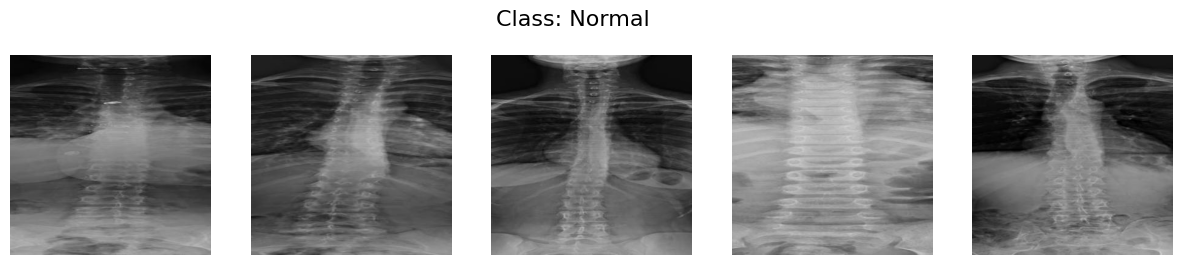

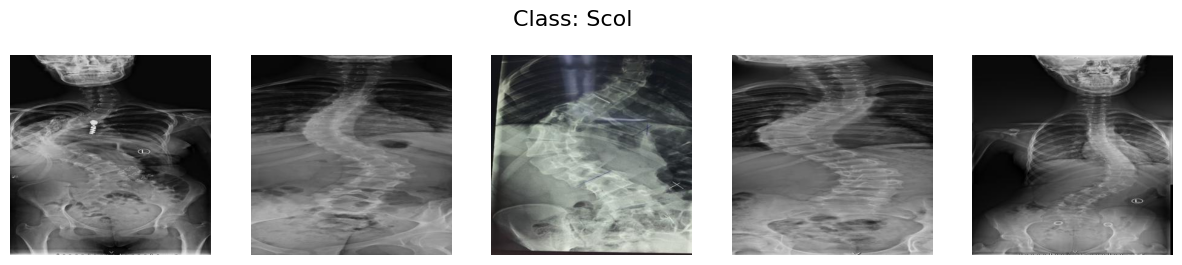

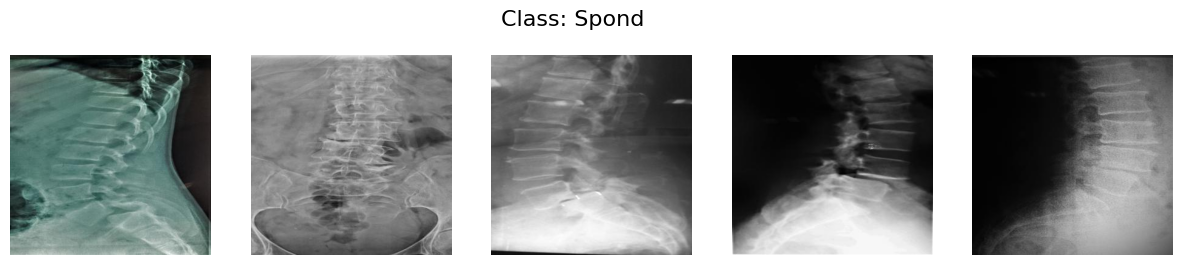

In [12]:
for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:5]  # Get first 5 images
    
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    
    plt.show()
    

In [13]:
dataset_path = base_path
image_data = []

folders = {'Normal': 1, 'Scol': 2, 'Spond': 3}

for folder_name, label in folders.items():
    folder_path = os.path.join(dataset_path, folder_name)
    
    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)
        
        for image_file in image_files:
            image_data.append((os.path.join(folder_path, image_file), label))
    else:
        print(f"Folder {folder_path} not found.")

df = pd.DataFrame(image_data, columns=['image_path', 'label'])
df.head()

,image_path,label
0,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
1,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
2,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
3,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
4,/kaggle/input/the-vertebrae-xray-images/xkt857...,1


In [15]:
df.shape



(338, 2)

In [16]:
df.columns



Index(['image_path', 'label'], dtype='object')

In [17]:
df.duplicated().sum()



0

In [18]:
df.isnull().sum()



image_path    0
label         0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  338 non-null    object
 1   label       338 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


oversampling as the dataset is highly imbalanced

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['label'])
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
1    188
2    188
3    188
Name: count, dtype: int64


In [21]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

In [25]:
df_resampled['label'] = df_resampled['label'].astype(str)

In [26]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label'] 
)

Basic Image processing

In [27]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 451 validated image filenames belonging to 3 classes.
Found 56 validated image filenames belonging to 3 classes.
Found 57 validated image filenames belonging to 3 classes.


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Xception Model with Attention Mechanism
This code defines a custom deep learning model based on the Xception architecture, integrating an Attention Mechanism on top of the Xception model's feature outputs.

In [30]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/5


I0000 00:00:1730360046.424300     549 service.cc:145] XLA service 0x7efd48002340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730360046.424363     549 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/29 ━━━━━━━━━━━━━━━━━━━━ 8:30 18s/step - accuracy: 0.3125 - loss: 1.3905

I0000 00:00:1730360057.991902     549 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 626ms/step - accuracy: 0.7169 - loss: 0.6505 - val_accuracy: 0.8571 - val_loss: 0.3048
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9015 - loss: 0.2674 - val_accuracy: 0.9107 - val_loss: 0.3689
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.9682 - loss: 0.0771 - val_accuracy: 0.9643 - val_loss: 0.1813
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9732 - loss: 0.0973 - val_accuracy: 0.8750 - val_loss: 0.3259
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.9923 - loss: 0.0487 - val_accuracy: 0.9464 - val_loss: 0.1800


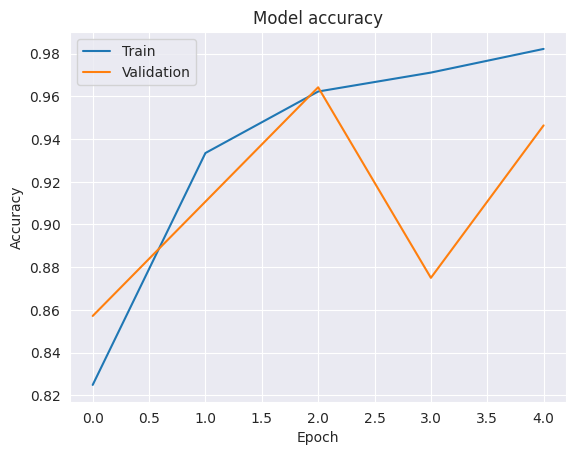

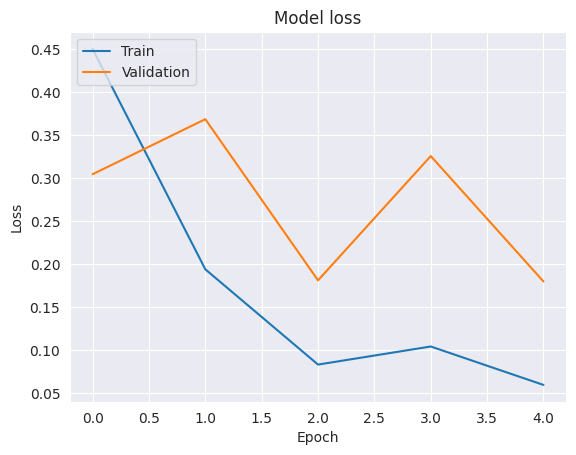

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step 


In [33]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.79      0.88        19
           3       0.90      1.00      0.95        19

    accuracy                           0.93        57
   macro avg       0.94      0.93      0.93        57
weighted avg       0.94      0.93      0.93        57



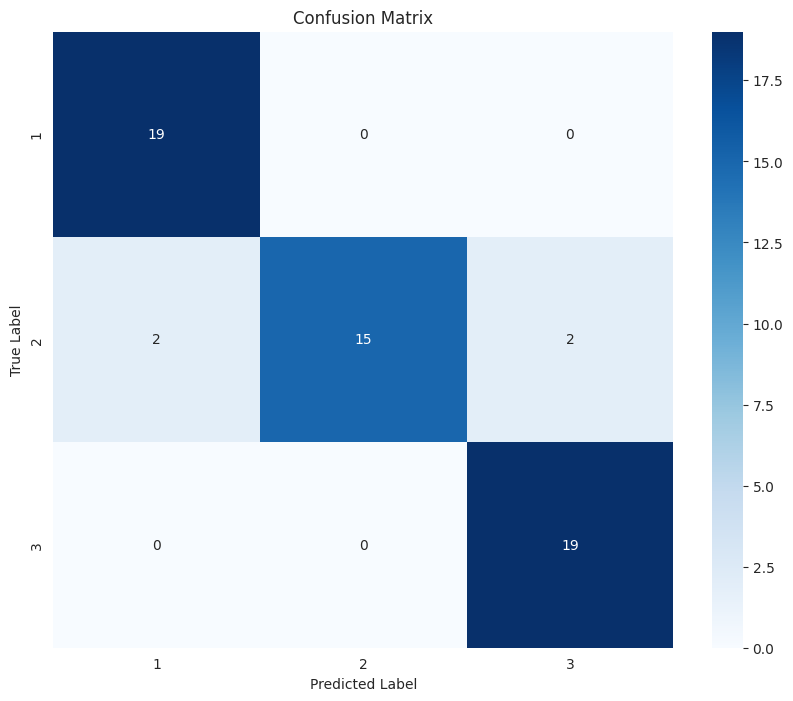

In [35]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):
    
    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x) 

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)  

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 844ms/step - accuracy: 0.7783 - loss: 0.5419 - val_accuracy: 0.9643 - val_loss: 0.1151
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9688 - loss: 0.1029 - val_accuracy: 0.8750 - val_loss: 0.2969
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9894 - loss: 0.0721 - val_accuracy: 0.9286 - val_loss: 0.1984
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9627 - loss: 0.1074 - val_accuracy: 0.7679 - val_loss: 1.3340
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9889 - loss: 0.0483 - val_accuracy: 0.6964 - val_loss: 1.8410


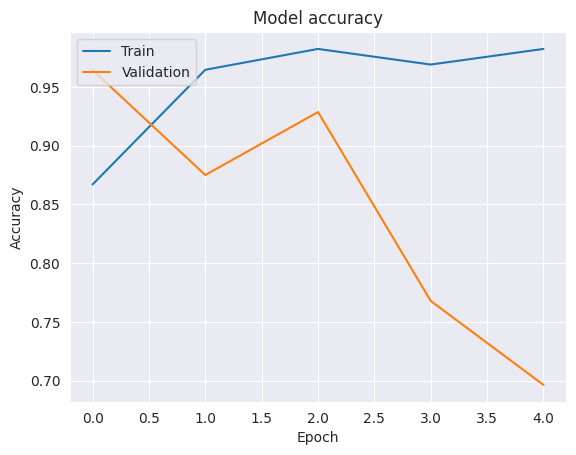

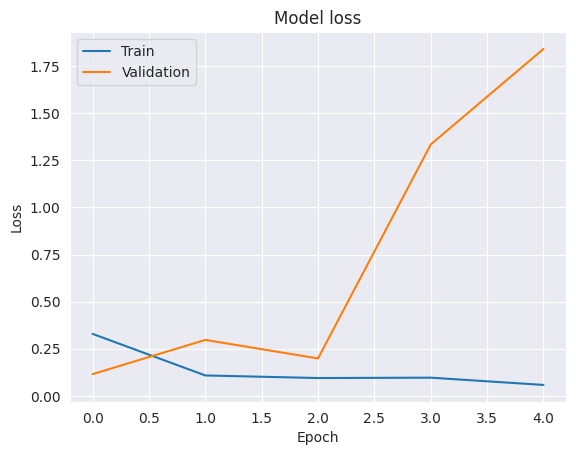

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


In [39]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        19

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



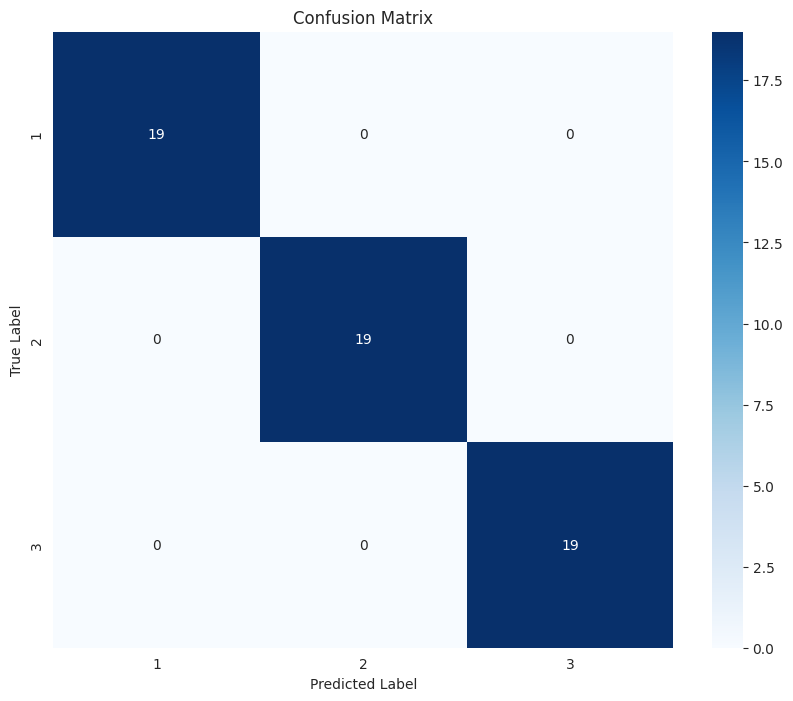

In [40]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_densenet_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = DenseNet121(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels))(x)
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

input_shape = (224, 224, 3)
densenet_model = create_densenet_model(input_shape)

densenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [42]:
history = densenet_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7789 - loss: 0.6299 - val_accuracy: 0.6250 - val_loss: 0.7989
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9219 - loss: 0.2282 - val_accuracy: 0.7679 - val_loss: 0.4738
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9548 - loss: 0.0987 - val_accuracy: 0.9821 - val_loss: 0.1633
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9828 - loss: 0.0542 - val_accuracy: 1.0000 - val_loss: 0.1199
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9714 - loss: 0.0743 - val_accuracy: 0.8929 - val_loss: 0.2998


In [43]:
test_labels = test_gen_new.classes  
predictions = densenet_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step


In [44]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.59      1.00      0.75        19
           2       0.71      0.89      0.79        19
           3       1.00      0.05      0.10        19

    accuracy                           0.65        57
   macro avg       0.77      0.65      0.55        57
weighted avg       0.77      0.65      0.55        57



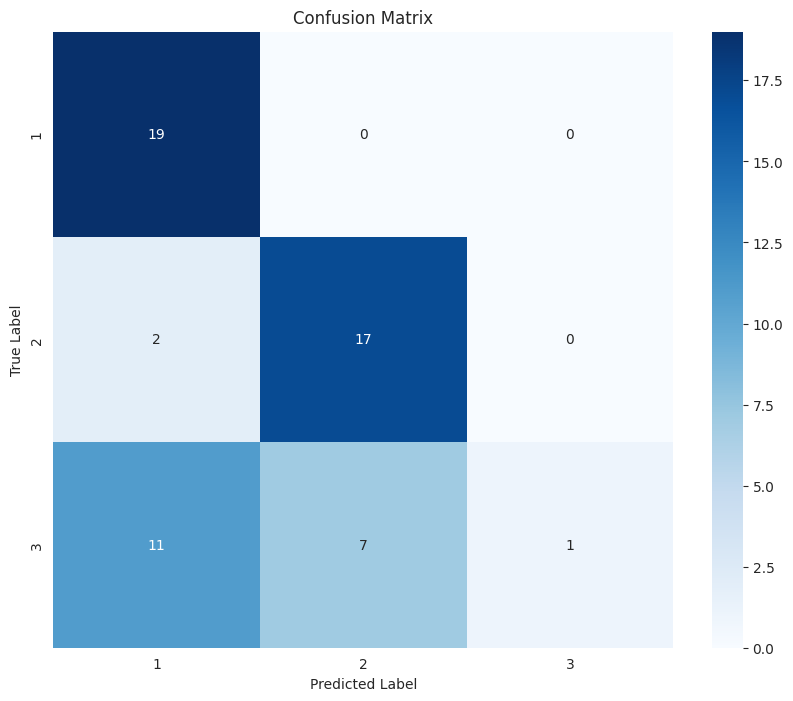

In [45]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Dense, GlobalAveragePooling2D, Dropout, Reshape, MultiHeadAttention, GaussianNoise, Add
from tensorflow.keras.models import Model

def conv3x3(filters, stride=1):
    return Conv2D(filters, kernel_size=3, strides=stride, padding="same", use_bias=False)

class BasicBlock(tf.keras.layers.Layer):
    def __init__(self, filters, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(filters, stride)
        self.bn1 = BatchNormalization()
        self.relu = ReLU()
        self.conv2 = conv3x3(filters)
        self.bn2 = BatchNormalization()
        
        # If stride != 1 or the number of filters changes, apply downsampling
        self.downsample = None
        if stride != 1 or filters != self.conv2.filters:
            self.downsample = tf.keras.Sequential([
                Conv2D(filters, kernel_size=1, strides=stride, use_bias=False),
                BatchNormalization()
            ])

    def call(self, x, training=False):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out, training=training)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out, training=training)
        
        if self.downsample is not None:
            residual = self.downsample(x, training=training)
        
        out += residual
        return self.relu(out)

class GbcNet(Model):
    def __init__(self, input_shape, num_classes=3, attention_type='channel', base_filters=64):
        super(GbcNet, self).__init__()
        self.base_filters = base_filters
        self.conv1 = Conv2D(base_filters, kernel_size=7, strides=2, padding="same", use_bias=False)
        self.bn1 = BatchNormalization()
        self.relu = ReLU()
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same")

        # Define layers with attention mechanisms
        self.layer1 = self._make_layer(filters=64, blocks=3, stride=1)
        self.layer2 = self._make_layer(filters=128, blocks=4, stride=2)
        self.layer3 = self._make_layer(filters=256, blocks=6, stride=2)
        self.layer4 = self._make_layer(filters=512, blocks=3, stride=2)

        self.global_avg_pool = GlobalAveragePooling2D()
        self.gaussian_noise = GaussianNoise(0.25)  # Move GaussianNoise here
        self.fc1 = Dense(512, activation='relu')
        self.dropout = Dropout(0.25)
        self.output_layer = Dense(num_classes, activation='softmax')

    def _make_layer(self, filters, blocks, stride):
        layers = [BasicBlock(filters, stride)]
        for _ in range(1, blocks):
            layers.append(BasicBlock(filters))
        return tf.keras.Sequential(layers)

    def call(self, x, training=False):
        x = self.conv1(x)
        x = self.bn1(x, training=training)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.layer1(x, training=training)
        x = self.layer2(x, training=training)
        x = self.layer3(x, training=training)
        x = self.layer4(x, training=training)

        x = self.global_avg_pool(x)
        x = self.gaussian_noise(x, training=training)  # Use GaussianNoise layer here
        x = self.fc1(x)
        x = self.dropout(x, training=training)
        return self.output_layer(x)

input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)
model_output = GbcNet(input_shape=input_shape, num_classes=3)(inputs)
gbcnet_model = Model(inputs=inputs, outputs=model_output)

gbcnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history = gbcnet_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/5
25/29 ━━━━━━━━━━━━━━━━━━━━ 2s 573ms/step - accuracy: 0.4299 - loss: 1.5097

I0000 00:00:1730361519.502438     549 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_146', 48 bytes spill stores, 48 bytes spill loads



29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 635ms/step - accuracy: 0.4494 - loss: 1.4632 - val_accuracy: 0.3393 - val_loss: 1.2047
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7537 - loss: 0.6061 - val_accuracy: 0.3393 - val_loss: 1.8568
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8225 - loss: 0.4449 - val_accuracy: 0.3393 - val_loss: 3.5360
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8893 - loss: 0.2909 - val_accuracy: 0.3393 - val_loss: 3.4213
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9506 - loss: 0.1556 - val_accuracy: 0.3393 - val_loss: 5.3657


In [50]:
test_labels = test_gen_new.classes  
predictions = gbcnet_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 796ms/step


In [51]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        19
           3       0.33      1.00      0.50        19

    accuracy                           0.33        57
   macro avg       0.11      0.33      0.17        57
weighted avg       0.11      0.33      0.17        57

